In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\ML\Machine-Learning-Practice\regression_metrics\placement.csv')

In [4]:
df.sample(frac= 0.05)

,cgpa,package
69,7.30,2.94
61,5.48,1.61
188,7.35,3.08
85,4.79,1.48
196,5.89,2.57
77,8.99,4.60
161,7.30,3.33
178,8.15,3.63
109,7.77,4.06
139,7.19,2.40


In [5]:
df.shape

(200, 2)

In [6]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


Text(0, 0.5, 'package')

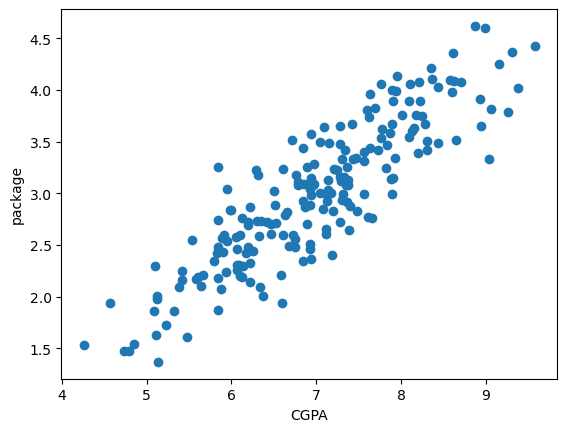

In [11]:
plt.scatter(x= df['cgpa'] , y= df['package'])
plt.xlabel('CGPA')
plt.ylabel('package')

In [17]:
X = df.iloc[:,:1]
y = df.iloc[:,1]

In [18]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state= 2)

In [34]:
X_train

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77
...,...
43,7.66
22,6.14
72,7.78
15,7.25


In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [36]:
X_train

array([[ 0.14093929],
       [ 1.82211434],
       [-1.47449149],
       [-1.77503675],
       [ 0.73263777],
       [-0.21595821],
       [-0.09386169],
       [-0.29109452],
       [ 0.86412633],
       [ 0.84534225],
       [ 1.61548948],
       [ 0.90169448],
       [-0.3568388 ],
       [-0.68556018],
       [-0.43197511],
       [-0.53528755],
       [-1.76564471],
       [-0.84522485],
       [-0.05629354],
       [ 0.0470189 ],
       [-0.98610544],
       [-0.882793  ],
       [-1.08941787],
       [-0.9767134 ],
       [ 2.17901184],
       [-1.32421886],
       [ 0.83595021],
       [-0.80765669],
       [ 0.72324573],
       [-2.00983773],
       [-0.75130445],
       [ 1.51217704],
       [-0.86400892],
       [ 0.17850745],
       [-1.75625267],
       [ 0.37574028],
       [ 1.18345567],
       [ 1.21163178],
       [ 0.13154725],
       [ 0.33817212],
       [-1.24908254],
       [-0.93914524],
       [ 0.95804672],
       [ 0.14093929],
       [-0.61042386],
       [-0

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = lr.predict(X_test)

In [39]:
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [40]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [42]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error,mean_absolute_error,r2_score
print("MSE" , mean_squared_error(y_test,y_pred) )
print("MAE" , mean_absolute_error(y_test,y_pred))
print('RMAE' , root_mean_squared_error(y_test,y_pred))
print("R2_score" , r2_score(y_test,y_pred))

MSE 0.12129235313495532
MAE 0.2884710931878175
RMAE 0.3482705171773162
R2_score 0.780730147510384


In [45]:
# adjusted r2_score
ad_r2 =1 - (((1 - r2_score(y_test,y_pred))* (40 -1)) / (40-1-1))
ad_r2

0.7749598882343415

In [43]:
X_test.shape

(40, 1)

In [46]:
new_df = df.copy()

In [48]:
new_df['random_feature'] = np.random.random(200)

In [54]:
new_df = new_df[['cgpa','random_feature', 'package']]


In [52]:
new_df.columns

Index(['cgpa', 'package', 'random_feature'], dtype='object')

In [55]:
new_df.sample()

,cgpa,random_feature,package
41,6.89,0.645981,2.7


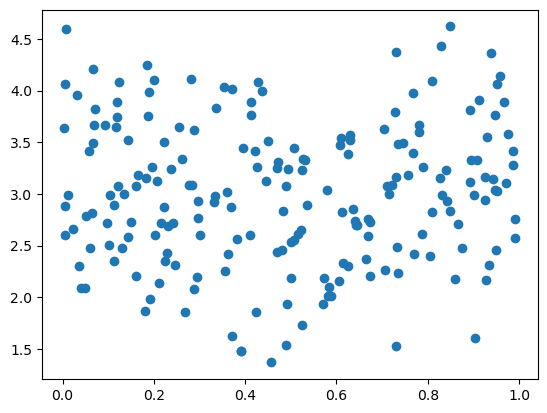

In [57]:
plt.scatter(new_df['random_feature'] , new_df['package'])

In [59]:
new_df.head()

,cgpa,random_feature,package
0,6.89,0.196626,3.26
1,5.12,0.190449,1.98
2,7.82,0.470025,3.25
3,7.42,0.781620,3.67
4,6.94,0.629574,3.57


In [60]:
X = new_df.drop(columns='package')

In [61]:
y =new_df['package']

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test ,y_train ,y_test = train_test_split(X,y , test_size= 0.2 , random_state= 2)

In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train ,y_train)

LinearRegression()

In [64]:
y_pred = lr.predict(X_test)

In [73]:
from sklearn.metrics import r2_score,mean_squared_error ,mean_absolute_error , root_mean_squared_error
print("Mse" , mean_squared_error(y_test,y_pred))
print("MAE" , mean_absolute_error(y_test,y_pred))
print("RMSE" , root_mean_squared_error(y_test,y_pred))
print("r2_score" , r2_score(y_test,y_pred))



Mse 0.12223767899031837
MAE 0.2908306353594397
RMSE 0.3496250548663788
r2_score 0.7790212066290949


In [80]:
adr2 = 1 -(((1 - 0.779)* (40 -1)) / (40-1-2))
adr2

0.767054054054054